In [1]:
import sys
sys.path.insert(0, "/home/qite/my/pytorch-pose/")

In [2]:
from pose.datasets import Mpii
mpii = Mpii(jsonfile='/home/qite/my/pytorch-pose/data/mpii/mpii_annotations.json',
            img_folder='/home/qite/my/pytorch-pose/data/mpii/images',
            meanstd_file='/home/qite/my/pytorch-pose/data/mpii/mean.pth.tar',
            sigma=1, label_type="Gaussian", label_data=Mpii.LABEL_PARTS_MAP)

    Mean: 0.4404, 0.4440, 0.4327
    Std:  0.2458, 0.2410, 0.2468


7868
[[   0.            0.            0.        ]
 [ 672.          501.            1.        ]
 [ 681.          308.            1.        ]
 [ 598.          313.            0.        ]
 [ 598.          508.            0.        ]
 [   0.            0.            0.        ]
 [ 640.          311.            0.        ]
 [ 665.          127.            0.        ]
 [ 671.44799805  111.52600098    1.        ]
 [ 698.55200195   46.47399902    1.        ]
 [ 775.          308.            1.        ]
 [ 725.          212.            1.        ]
 [ 718.          121.            1.        ]
 [ 612.          132.            0.        ]
 [ 591.          208.            0.        ]
 [ 606.          243.            0.        ]]
[[ 126.   37.    0.]
 [  27.   60.    0.]
 [  38.   37.    0.]
 [  29.   32.    1.]
 [  19.   55.    1.]
 [ 126.   37.    0.]
 [  34.   35.    0.]
 [  42.   12.    0.]
 [  42.   10.    1.]
 [  42.    1.    1.]
 [  42.   29.    0.]
 [  45.   26.    0.]
 [  47.   16.    0.]
 

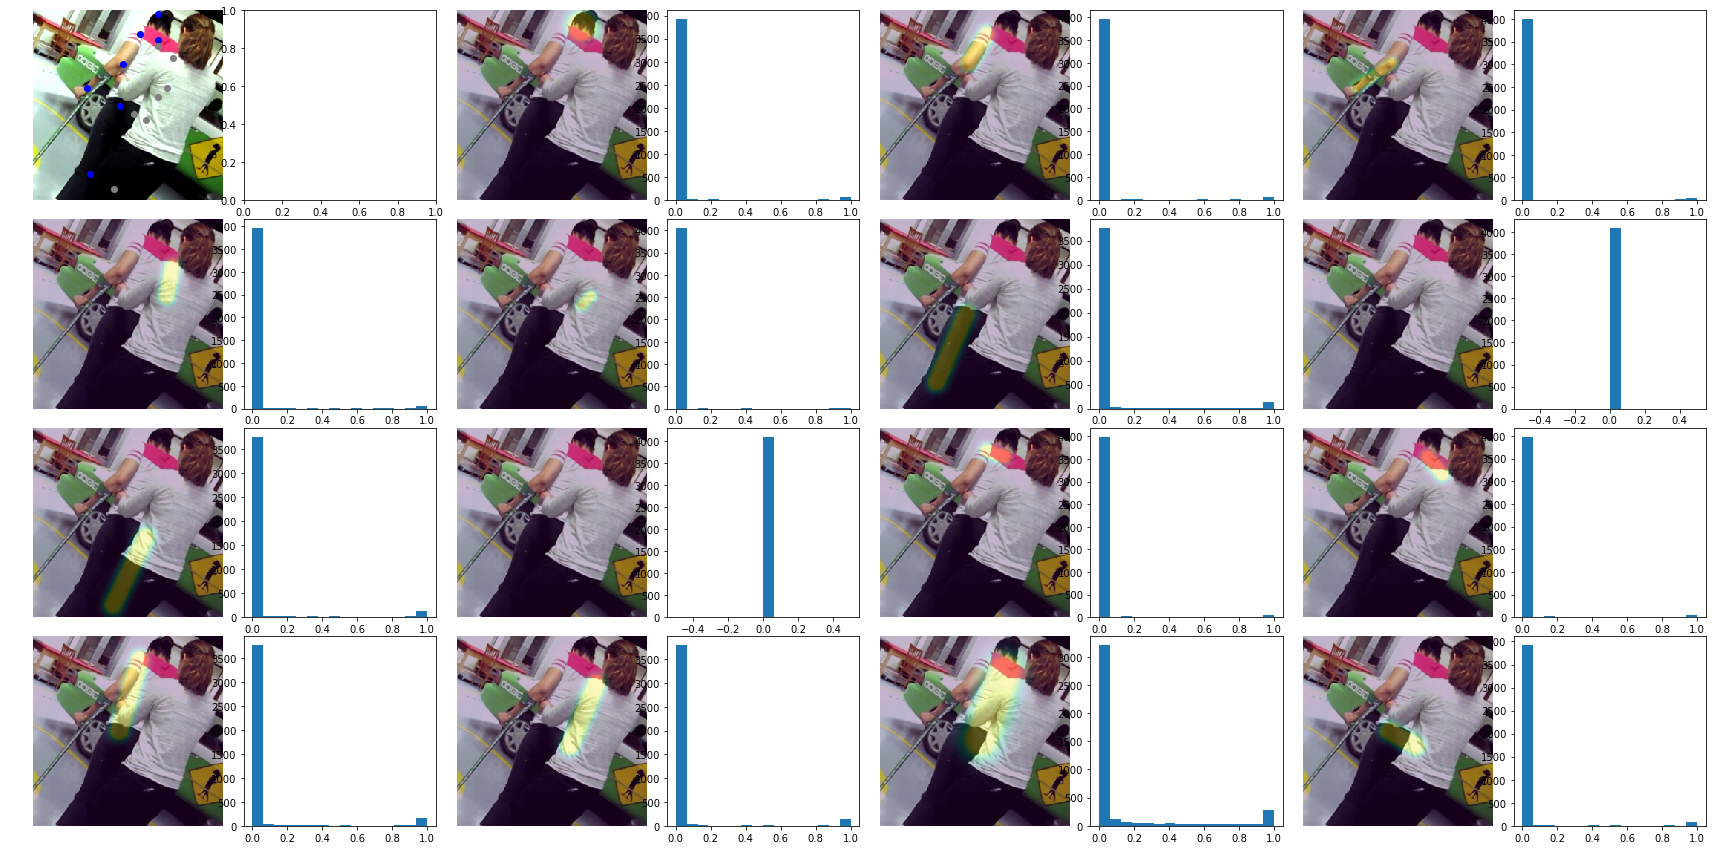

In [16]:
%matplotlib inline
import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt
from pose.utils.misc import to_numpy

fig, axs = plt.subplots(4, 8, figsize=(30, 15), gridspec_kw={'wspace':0.1, 'hspace':0.1})
img_idx = np.random.randint(0, len(mpii))
img_idx = 7868
print(img_idx)
np.seterr(invalid='raise')
img, target, meta = mpii[img_idx]
pts = to_numpy(meta['pts'])
tpts = to_numpy(meta['tpts'])
print(pts)
print(tpts)
xs = tpts[:, 0] * 4
ys = tpts[:, 1] * 4
real_img = to_numpy(img+mpii.mean.view(3,1,1).expand_as(img)).transpose(1,2,0)
axs[0,0].imshow(real_img)
not_annoted = (np.isclose(pts, 0).sum(1) == 3)
visible = (tpts[:, 2] == 1)
axs[0,0].scatter(xs[~not_annoted & visible], ys[~not_annoted & visible], color='blue')
axs[0,0].scatter(xs[~not_annoted & ~visible], ys[~not_annoted & ~visible], color='gray')
axs[0,0].axis('off')
# final_img = np.zeros(to_numpy(target[0]).shape)
for i, t in enumerate(target):
    # final_img += to_numpy(target[i])
    axs.flat[(i+1)*2].imshow(real_img)
    timg = imresize(to_numpy(target[i]), real_img.shape[:2])
    axs.flat[(i+1)*2].imshow(timg, alpha=0.3)
    axs.flat[(i+1)*2].axis('off')
    axs.flat[(i+1)*2+1].hist(to_numpy(target[i]).ravel(), bins=16)
    print(timg.mean())
    
# fig2, axs2 = pt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace':0.02, 'hspace':0.02})

#axs[0,1].imshow(final_img)